<a href="https://colab.research.google.com/github/CREVIOS/SSI_2020/blob/master/Lecture_4_1_Introduction_to_Probability_%5BSOLUTIONS%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.1 Introduction to Probability [SOLUTIONS]
Let's practice simulating probability with code!

# Setup
Run the below cell to import the libraries we'll need for today's codealongs!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Codealong - Probability Estimation
Write a program to estimate the following probability:

*You are playing a 7-point ping pong game with your friend. You win a point with probability p = 0.3 (and lose a point with probability 1 - p = 0.7). What’s the probability you win the game (no deuces/no win by 2 needed)?*

To do this, do the following:

*   Write a function `simulate_ping_pong` (that takes parameters `p` and `max_score`) to simulate one 7-point game, and return whether you won as a boolean.
*   Use that function in the main to calculate and print an estimate.

As a reminder, here are some of the basic ways to generate randomness in Python:

In [ ]:
# Generating a random float from a uniform interval [low, high)
# If you don't pass anything in, it defaults to [0,1)
x = np.random.uniform()
y = np.random.uniform(10, 15)

# Generating a random INTEGER from low (inclusive) to high (exclusive)
# If you don't pass anything in a parameter for low, it goes from 0 (inclusive)
# to high (exclusive)
z = np.random.randint(5, 15)
a = np.random.randint(8)

# Generating a random sample of the amount of "heads" when we make
# n independent "coin flips" where P(head) = p
b = np.random.binomial(4, 0.5)

print("Our outputs from above are {}, {}, {}, {}, {}".format(x,y,z,a,b))

Our outputs from above are 0.826601025878997, 14.833566848863455, 11, 3, 2


Write your code down here!

In [ ]:
def simulate_ping_pong(p, max_score=7):
    # TODO: write your code here
    # Return True if p1 wins, False if p2 wins
    # p1, p2 scores start at 0. until someone has 7 points, randomly give a point to winner

    p1_score, p2_score = 0, 0
    while p1_score < max_score and p2_score < max_score:
      point = np.random.binomial(1, p) # num of heads in 1 coin flip, P(head)=p
      if point == 1: # point=1 with probability p, and 0 with probability 1-p
        p1_score += 1
      else: # point == 0
        p2_score += 1
    # stop when one person reaches 7. guaranteed that either p1_score == 7 OR p2_score == 7
    return p1_score > p2_score # p1_score == 7
    # if p1_score == 7:
    #   return True
    # else:
    #   return False

def sim_trials(n):
    p = 0.5 # the probability I win a point
    count = 0
    for i in range(n): # repeat the game 100000 times
      # if we won the game, add one to count
      if simulate_ping_pong(p=p, max_score=7):
        count += 1
    prob_est = count / n
    print(prob_est)

if __name__ == "__main__":
    sim_trials(1000000)

0.49945


# Codealong - Gotta Catch 'Em All!
You are just starting a video game with monsters, and you want to “catch them all”. If there are `n = 50` different monsters and each shows up in the wild grass with equal probability, how many encounters do you have to make until you’ve caught them all? (Assume you always successfully catch the monster on each encounter).

Write code to answer this question by doing the following:


*   Write a function called `see_all_monsters` that simulates looking in the grass until you find all `n` monsters. (This is akin to simulating one game of ping pong).
*   Use that function in the main to calculate and print an estimate.

At the end of the main we have some code to print the true average encounters it should take. Compare that value to your experimentally-determined value and see how close we got!

In [ ]:
def see_all_monsters(n_monsters):
    encountered_monsters = set()
    num_encounters = 0
    # treat each monster as a number 1-50 (1-n_monsters)
    while len(encountered_monsters) < n_monsters:
      num_encounters += 1
      monster = np.random.randint(low=1, high=n_monsters+1) # {1,2,3,....,n_monsters}
      encountered_monsters.add(monster)
    return num_encounters

def sim_trials(n_trials, n_monsters):
    total_encounters = 0
    for i in range(n_trials):
      total_encounters += see_all_monsters(n_monsters)
    est_avg_encounters = total_encounters / n_trials
    print("Estimated Average: {}".format(est_avg_encounters))

if __name__ == "__main__":
    n = 75
    sim_trials(n_trials=5000, n_monsters=n)

    # Some code to calculate the theoretical average
    print("True Average: {}".format(n * np.sum(1/np.arange(1, n+1))))

Estimated Average: 367.7372
True Average: 367.6016722914785


# Codealong - Plotting Probability
Use your code from earlier for ping pong, to make a carefully labelled plot with:

  * The x-axis being the probability of winning a point (p)
  * The y-axis being the estimated probability of winning the 7-point game as a function of p.

Plot for values of p between 0 to 1 in increments of 0.01.

Do this by putting your code that was in main before in a function called `sim_trials` and running that function in main within a loop to generate results!

Hint: Use `numpy` to store your results!

Your final output should look something like:

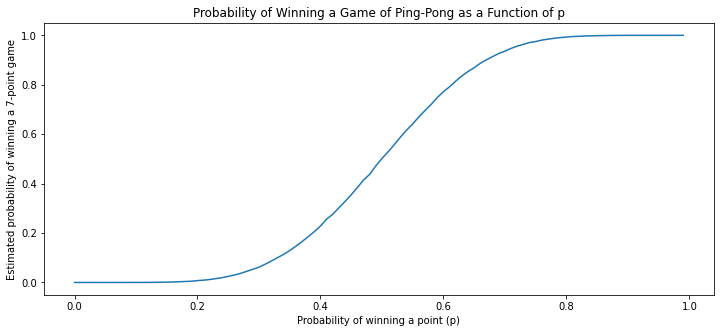

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0004, 0.0, 0.0002, 0.0004, 0.0016, 0.0016, 0.003, 0.0056, 0.0042, 0.0098, 0.0082, 0.0142, 0.0156, 0.023, 0.0258, 0.0316, 0.037, 0.0424, 0.0506, 0.0636, 0.072, 0.0826, 0.1032, 0.1178, 0.1312, 0.1476, 0.1618, 0.1874, 0.2034, 0.2326, 0.264, 0.2856, 0.2976, 0.3238, 0.3534, 0.3902, 0.402, 0.4428, 0.474, 0.5126, 0.526, 0.565, 0.5808, 0.6192, 0.6384, 0.6768, 0.7, 0.7268, 0.753, 0.7728, 0.7938, 0.8124, 0.8382, 0.8482, 0.874, 0.8846,

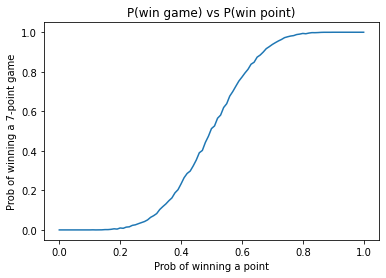

In [ ]:
def simulate_ping_pong(p, max_score=7):
    # TODO: write your code here
    # Return True if p1 wins, False if p2 wins
    # p1, p2 scores start at 0. until someone has 7 points, randomly give a point to winner

    p1_score, p2_score = 0, 0
    while p1_score < max_score and p2_score < max_score:
      point = np.random.binomial(1, p) # num of heads in 1 coin flip, P(head)=p
      if point == 1: # point=1 with probability p, and 0 with probability 1-p
        p1_score += 1
      else: # point == 0
        p2_score += 1
    # stop when one person reaches 7. guaranteed that either p1_score == 7 OR p2_score == 7
    return p1_score > p2_score # p1_score == 7
    # if p1_score == 7:
    #   return True
    # else:
    #   return False

def sim_trials(n, p):
    count = 0
    for i in range(n): # repeat the game 100000 times
      # if we won the game, add one to count
      if simulate_ping_pong(p=p, max_score=7):
        count += 1
    prob_est = count / n
    return prob_est
    # print(prob_est)

if __name__ == "__main__":
    # TODO: Write code to calculate the probabilities
    probs = np.arange(0, 1.01, 0.01) # start at 0, end at 1.01 (exclusive), go up by 0.01
    results = []
    for p in probs:
      results.append(sim_trials(n=5000, p=p))
    print(probs)
    print(results)
    plt.xlabel("Prob of winning a point")
    plt.ylabel("Prob of winning a 7-point game")
    plt.title("P(win game) vs P(win point)")
    plt.plot(probs, results)
    plt.show()
    # TODO: Write code to plot the figure